In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
file_path = './jobcomp'

#columns to analyze
columns = [
    "JobId", "UserId", "GroupId", "Name", "JobState", "Partition", 
    "TimeLimit", "StartTime", "EndTime", "NodeCnt", "ProcCnt", 
    "Account", "QOS", "SubmitTime", "EligibleTime"
]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=columns)

In [3]:
#number of lines you want to read
nlines=1500
iline=0
with open('jobcomp.log', 'r') as file:    
    for line in file:
        parts = line.split()
        
        #form a dictionary with the values we want to keep (included in the columns list)
        dic={}
        for i in range(len(parts)):
            key=parts[i].split("=",1)[0]
            
            if key in columns: 
                dic[key]=parts[i].split("=",1)[1]
        
        df=df.append(dic,ignore_index=True)
        
        iline+=1
        if iline >= nlines:
            break

#Change Time columns to datetime format
Time_cols=["SubmitTime", "EligibleTime", "StartTime", "EndTime"]
for col in Time_cols:
    df[col]=pd.to_datetime(df[col])

#calculate the WaitTime and ElapsedTime
df['WaitTime']=(df['StartTime']-df['SubmitTime']).dt.seconds
df['ElapsedTime']=(df['EndTime']-df['StartTime']).dt.seconds


#change JobId, NodeCnt, and ProcCnt type to int64
df['JobId']=pd.to_numeric(df['JobId'])
df['NodeCnt']=pd.to_numeric(df['NodeCnt'])
df['ProcCnt']=pd.to_numeric(df['ProcCnt'])

In [4]:
df

,JobId,UserId,GroupId,Name,JobState,Partition,TimeLimit,StartTime,EndTime,NodeCnt,ProcCnt,Account,QOS,SubmitTime,EligibleTime,WaitTime,ElapsedTime
0,1001,user5(1005),user5(1005),jobid_1001,COMPLETED,normal,1,2024-02-15 00:54:32,2024-02-15 00:54:32,1,12,account2,normal,2024-02-15 00:54:31,2024-02-15 00:54:31,1,0
1,1003,user4(1004),user4(1004),jobid_1003,COMPLETED,normal,1,2024-02-15 00:54:35,2024-02-15 00:54:40,1,1,account2,normal,2024-02-15 00:54:33,2024-02-15 00:54:33,2,5
2,1006,user3(1003),user3(1003),jobid_1006,COMPLETED,normal,1,2024-02-15 00:54:53,2024-02-15 00:55:02,1,12,account1,normal,2024-02-15 00:54:50,2024-02-15 00:54:50,3,9
3,1004,user3(1003),user3(1003),jobid_1004,COMPLETED,normal,1,2024-02-15 00:54:47,2024-02-15 00:55:08,1,12,account1,normal,2024-02-15 00:54:47,2024-02-15 00:54:47,0,21
4,1002,user1(1001),user1(1001),jobid_1002,COMPLETED,normal,1,2024-02-15 00:54:32,2024-02-15 00:55:12,1,1,account1,normal,2024-02-15 00:54:32,2024-02-15 00:54:32,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1178,user2(1002),user2(1002),jobid_1178,COMPLETED,normal,1,2024-02-15 01:40:00,2024-02-15 01:40:53,1,1,account1,normal,2024-02-15 00:59:36,2024-02-15 00:59:36,2424,53
496,1324,user2(1002),user2(1002),jobid_1324,COMPLETED,normal,1,2024-02-15 01:40:54,2024-02-15 01:41:01,1,1,account1,normal,2024-02-15 01:03:28,2024-02-15 01:03:28,2246,7
497,1401,user2(1002),user2(1002),jobid_1401,COMPLETED,normal,1,2024-02-15 01:41:01,2024-02-15 01:41:05,1,1,account1,normal,2024-02-15 01:05:40,2024-02-15 01:05:40,2121,4
498,1487,user2(1002),user2(1002),jobid_1487,COMPLETED,normal,1,2024-02-15 01:41:05,2024-02-15 01:41:15,1,1,account1,normal,2024-02-15 01:08:11,2024-02-15 01:08:11,1974,10


In [5]:
#check if there are any duplicates
#
#df['JobId'].duplicated()
#df[df['JobId'].duplicated()]

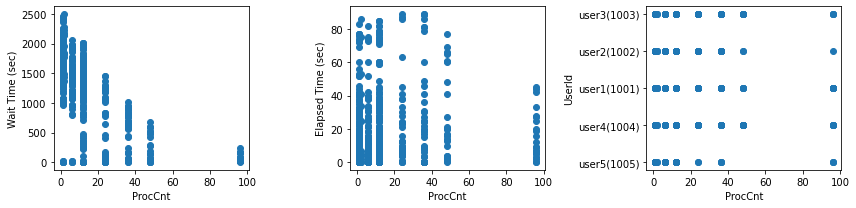

In [35]:
df_sorted_ProcCnt=df.sort_values(by = 'ProcCnt', ascending = True)

f,ax=plt.subplots(1,3,figsize=(12,3))

ax[0].plot(df_sorted_ProcCnt['ProcCnt'],df_sorted_ProcCnt['WaitTime'],'o')
ax[1].plot(df_sorted_ProcCnt['ProcCnt'],df_sorted_ProcCnt['ElapsedTime'],'o')
ax[2].plot(df_sorted_ProcCnt['ProcCnt'],df_sorted_ProcCnt['UserId'],'o')

ax[0].set_ylabel('Wait Time (sec)')
ax[1].set_ylabel('Elapsed Time (sec)')
ax[2].set_ylabel('UserId')

ax[0].set_xlabel('ProcCnt')
ax[1].set_xlabel('ProcCnt')
ax[2].set_xlabel('ProcCnt')

plt.tight_layout()

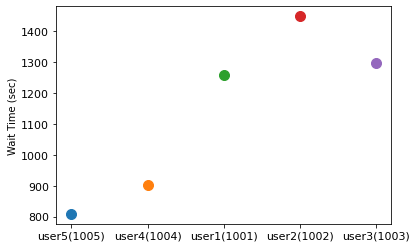

In [30]:
for username in df_sorted_ProcCnt['UserId'].unique():
    plt.plot(
        username,df_sorted_ProcCnt[df_sorted_ProcCnt['UserId']==username]['WaitTime'].mean(),'o',ms=10
    )
plt.ylabel('Wait Time (sec)')
plt.tick_params(axis='both', which='major', labelsize=11)

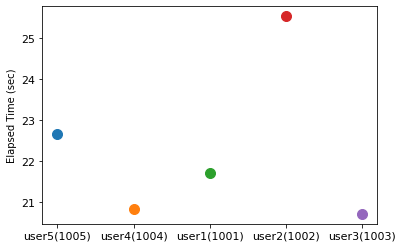

In [29]:
for username in df_sorted_ProcCnt['UserId'].unique():
    plt.plot(
        username,df_sorted_ProcCnt[df_sorted_ProcCnt['UserId']==username]['ElapsedTime'].mean(),'o',ms=10
    )
plt.ylabel('Elapsed Time (sec)')
plt.tick_params(axis='both', which='major', labelsize=11)